In [143]:
%load_ext autoreload 
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
from scipy.special import j0, jn_zeros
import matplotlib.pyplot as plt 
import numpy as np
import os
%aimport Prebreakdown
%aimport Util

In [174]:
target_dirs = ['80x80','100x100','120x120','140x140','160x160']

In [175]:
files = {}
for dir in target_dirs:
    files[dir] = os.listdir(dir)
    try:
        files[dir].remove('.DS_Store')
    except:
        pass

    try:
        files[dir].remove('animation.gif')
    except:
        pass

In [176]:
times = {}

for key, value in files.items():
    times[key] = []
    for f in value:
        times[key].append(Util.get_time_from_dir_name(f))

In [177]:
for key in times.keys():
    times[key] = np.sort(np.array(times[key]))

In [149]:
times['160x160']

array([1.05000000e-15, 2.15250000e-15, 3.31012500e-15, ...,
       2.40492620e-10, 2.40577914e-10, 2.40663207e-10])

In [183]:
targets = 1e-11*np.arange(3,26)
targets

array([3.0e-11, 4.0e-11, 5.0e-11, 6.0e-11, 7.0e-11, 8.0e-11, 9.0e-11,
       1.0e-10, 1.1e-10, 1.2e-10, 1.3e-10, 1.4e-10, 1.5e-10, 1.6e-10,
       1.7e-10, 1.8e-10, 1.9e-10, 2.0e-10, 2.1e-10, 2.2e-10, 2.3e-10,
       2.4e-10, 2.5e-10])

(120, 120)


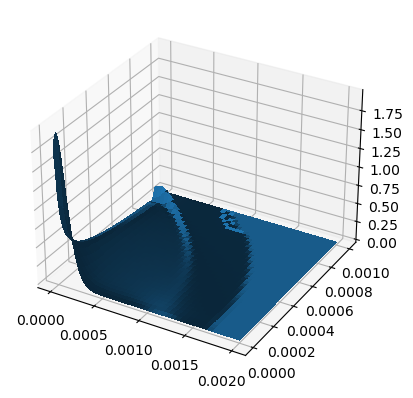

In [179]:
f = os.path.join('140x140',Util.dir_name_from_time(Util.find_nearest(times['140x140'],targets[10])))
n_140 = np.load(os.path.join(f,'n.npy'))
rr_140 = np.load(os.path.join(f,'rr.npy'))
zz_140 = np.load(os.path.join(f,'zz.npy'))

print(rr_140.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(rr_140, zz_140, n_140,linewidth=0, antialiased=False)

/var/folders/66/fyd9yn49169511y5p1lvfvx40000gq/T/ipykernel_16730/1497879989.py:7: RuntimeWarning: invalid value encountered in log10
  ax.plot_surface(rr_80, zz_80, np.log10(n_80),linewidth=0, antialiased=False)


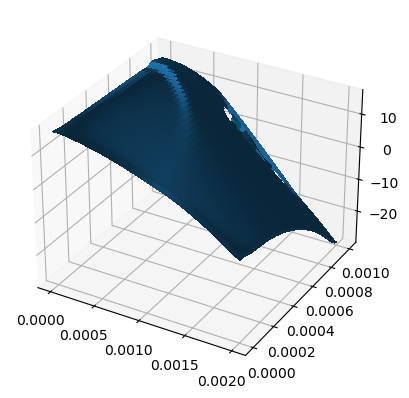

In [167]:
f = os.path.join('80x80',Util.dir_name_from_time(Util.find_nearest(times['80x80'],targets[10])))
n_80 = np.load(os.path.join(f,'n.npy'))
rr_80 = np.load(os.path.join(f,'rr.npy'))
zz_80 = np.load(os.path.join(f,'zz.npy'))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(rr_80, zz_80, np.log10(n_80),linewidth=0, antialiased=False)

/var/folders/66/fyd9yn49169511y5p1lvfvx40000gq/T/ipykernel_16730/1473196817.py:7: RuntimeWarning: invalid value encountered in log10
  ax.plot_surface(rr_160, zz_160, np.log10(n_160),linewidth=0, antialiased=False)


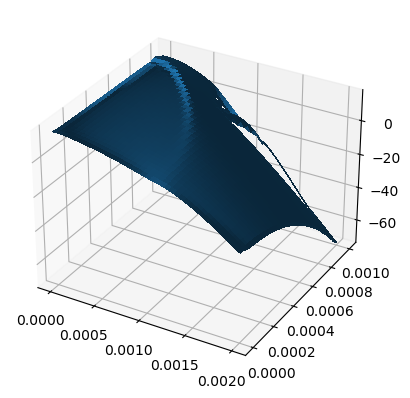

In [166]:
f = os.path.join('160x160',Util.dir_name_from_time(Util.find_nearest(times['160x160'],targets[10])))
n_160 = np.load(os.path.join(f,'n.npy'))
rr_160 = np.load(os.path.join(f,'rr.npy'))
zz_160 = np.load(os.path.join(f,'zz.npy'))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(rr_160, zz_160, np.log10(n_160),linewidth=0, antialiased=False)

In [184]:
error_80 = []
error_100 = []
error_120 = []
error_140 = []

for target in targets:
    f_80 = os.path.join('80x80',Util.dir_name_from_time(Util.find_nearest(times['80x80'],target)))
    f_100 = os.path.join('100x100',Util.dir_name_from_time(Util.find_nearest(times['100x100'],target)))
    f_120 = os.path.join('120x120',Util.dir_name_from_time(Util.find_nearest(times['120x120'],target)))
    f_140 = os.path.join('140x140',Util.dir_name_from_time(Util.find_nearest(times['140x140'],target)))
    f_160 = os.path.join('160x160',Util.dir_name_from_time(Util.find_nearest(times['160x160'],target)))

    n_80 = np.load(os.path.join(f_80,'n.npy'))
    rr_80 = np.load(os.path.join(f_80,'rr.npy'))
    zz_80 = np.load(os.path.join(f_80,'zz.npy'))

    n_100 = np.load(os.path.join(f_100,'n.npy'))
    rr_100 = np.load(os.path.join(f_100,'rr.npy'))
    zz_100 = np.load(os.path.join(f_100,'zz.npy'))

    n_120 = np.load(os.path.join(f_120,'n.npy'))
    rr_120 = np.load(os.path.join(f_120,'rr.npy'))
    zz_120 = np.load(os.path.join(f_120,'zz.npy'))

    n_140 = np.load(os.path.join(f_140,'n.npy'))
    rr_140 = np.load(os.path.join(f_140,'rr.npy'))
    zz_140 = np.load(os.path.join(f_140,'zz.npy'))

    n_160 = np.load(os.path.join(f_160,'n.npy'))
    rr_160 = np.load(os.path.join(f_160,'rr.npy'))
    zz_160 = np.load(os.path.join(f_160,'zz.npy'))

    error_80.append(Util.total_error(n_80,n_160,rr_80,zz_80,rr_160,zz_160))
    error_100.append(Util.total_error(n_100,n_160,rr_100,zz_100,rr_160,zz_160))
    error_120.append(Util.total_error(n_120,n_160,rr_120,zz_120,rr_160,zz_160))
    error_140.append(Util.total_error(n_140,n_160,rr_140,zz_140,rr_160,zz_160))
    
    

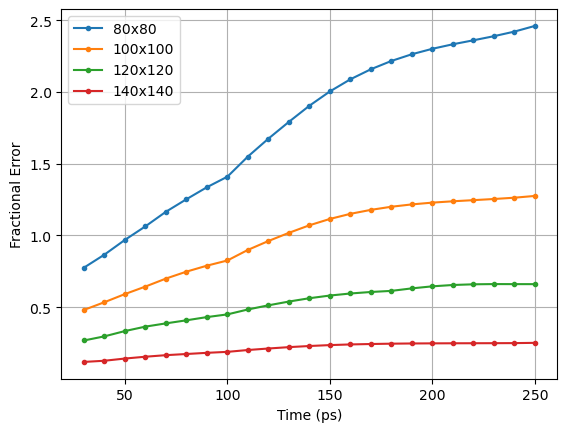

In [190]:
plt.plot(targets * 10**12,error_80,label='80x80',marker='.')
plt.plot(targets * 10**12,error_100,label='100x100',marker='.')
plt.plot(targets * 10**12,error_120,label='120x120',marker='.')
plt.plot(targets * 10 ** 12,error_140,label='140x140',marker='.')
plt.legend()
plt.xlabel('Time (ps)')
plt.ylabel('Fractional Error')
#plt.title('Error Estimates Based Off 160x160 Grid')
plt.grid()
plt.savefig('error.pdf')

In [188]:
error_120

[0.26861181546351637,
 0.29741237949669547,
 0.33426051124751255,
 0.36521271411922485,
 0.38778869704051233,
 0.40914717828783187,
 0.431562370652236,
 0.4503635517164309,
 0.4846645031381699,
 0.5135847315771775,
 0.5397967785312722,
 0.5630195039471465,
 0.5816983977690743,
 0.5959451511625778,
 0.6064432844068647,
 0.6141772496468044,
 0.6316107777208649,
 0.6458452840147861,
 0.6551630749922736,
 0.6599372293827009,
 0.6615563547696812,
 0.6611736487288508,
 0.661096122622745]

In [ ]:
plt.scatter(zz_160[:,10],n_160[:,10],label='160x160',marker='.')
#plt.scatter(zz_80[:,10],n_80[:,10],label='80x80',marker='.')
plt.scatter(zz_140[:,9],n_140[:,9],marker='.')
plt.legend()
plt.grid()
plt.savefig('160x160_1.pdf')

In [ ]:
nearest = Util.find_nearest(times['160x160'],targets[10])
next = times['160x160'][np.where(times['160x160'] == nearest)[0][0] + 2]

f = os.path.join('160x160',Util.dir_name_from_time(nearest))
n_1 = np.load(os.path.join(f,'n.npy'))
rr = np.load(os.path.join(f,'rr.npy'))
zz = np.load(os.path.join(f,'zz.npy'))

f_2 = os.path.join('160x160',Util.dir_name_from_time(next))
n_2 = np.load(os.path.join(f_2,'n.npy'))



In [ ]:
Util.total_error(n_1,n_2,rr,zz,rr,zz)
